In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Import raw data

In [57]:
import os
import sys
from google.colab import drive

try:
  drive.mount("/content/drive")
  project_path = "/content/drive/MyDrive/Pytorch pet projects/ML - Projects/ML-Store-Item-Demand-Forecasting-Challenge/data"
except:
  project_path ="../data"

df = raw_train = pd.read_csv(f"{project_path}/train.csv")
test_df = raw_test = pd.read_csv(f"{project_path}/test.csv")
ssub_df = raw_sample_submission = pd.read_csv(f"{project_path}/sample_submission.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Discover data

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [59]:
df.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


In [63]:
df.isnull().sum()

,0
date,0
store,0
item,0
sales,0
year,0
month,0
day,0
day_of_week,0
is_weekend,0


## Feature engineering
* Convert `data` to `datetime`

In [61]:
df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day
df["day_of_week"] = df["date"].dt.dayofweek
df["is_weekend"] = df["day_of_week"].isin([5,6]).astype(int)

## Visualization

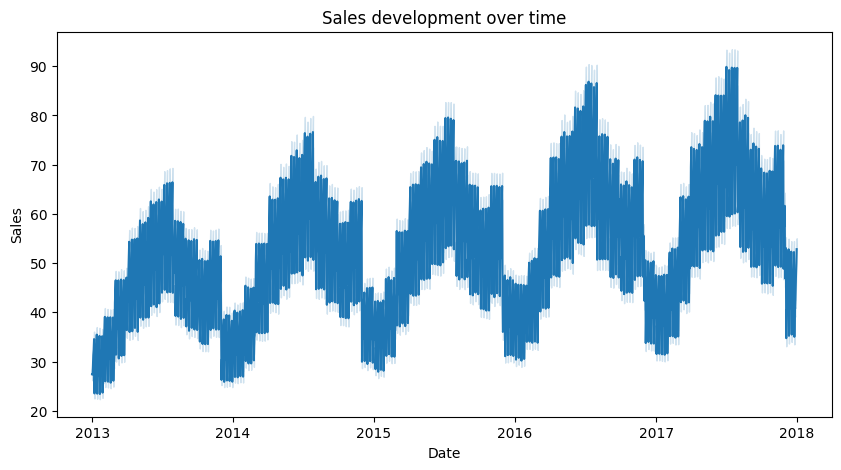

In [67]:
plt.figure(figsize=(10,5))
sns.lineplot(x="date", y="sales", data=df)
plt.title("Sales development over time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

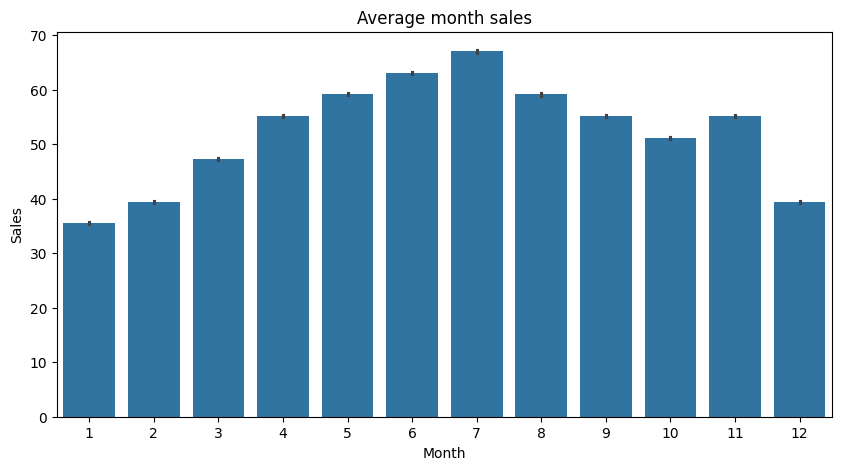

In [70]:
plt.figure(figsize=(10,5))
sns.barplot(x="month", y="sales", data=df)
plt.title("Average month sales")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

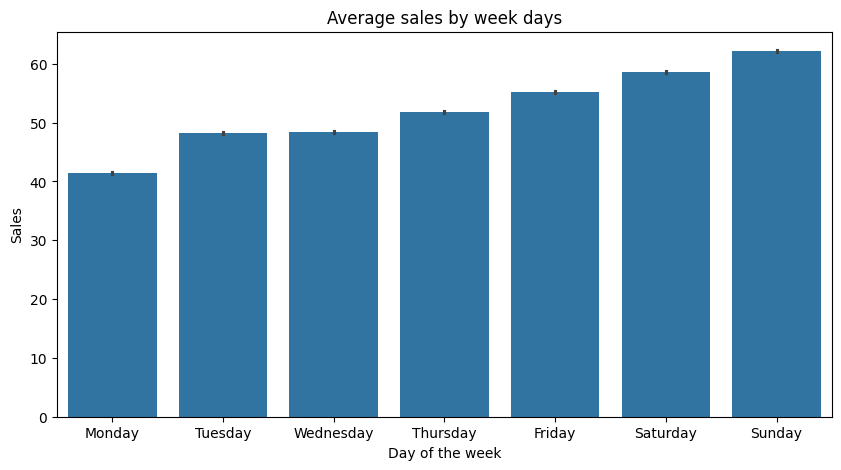

In [76]:
days_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

plt.figure(figsize=(10,5))
ax = sns.barplot(x="day_of_week", y="sales", data=df)

ax.set_xticks(range(7))
ax.set_xticklabels(days_of_week)

plt.title("Average sales by week days")
plt.xlabel("Day of the week")
plt.ylabel("Sales")
plt.show();

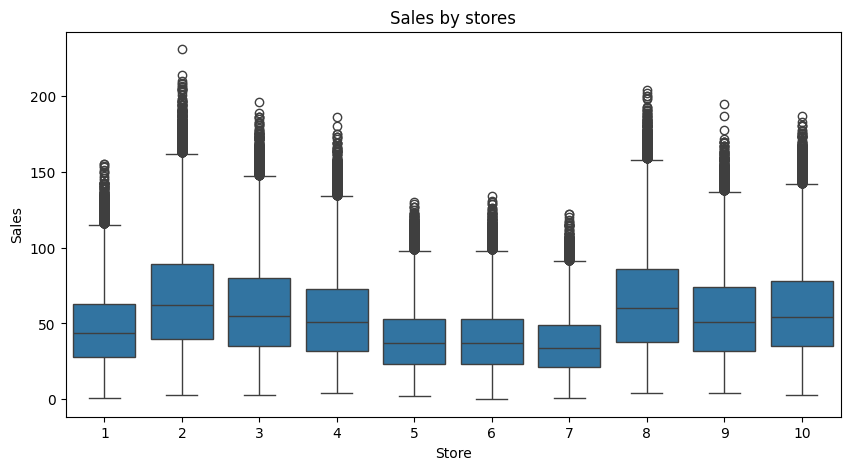

In [79]:
plt.figure(figsize=(10,5))
sns.boxplot(x="store", y="sales", data=df)
plt.title("Sales by stores")
plt.xlabel("Store")
plt.ylabel("Sales")
plt.show()